In [27]:
from sklearn.model_selection import train_test_split
import openpyxl
import numpy as np
import sys
sys.path.append('../')  
from DE import DifferentialEvolution
from PSO import ParticleSwarmOptimizer
from BO import BeeOptimizer
import matplotlib.pyplot as plt

In [2]:
def plot_fitness(best_fitnesses):
    plt.figure()
    plt.plot(np.arange(len(best_fitnesses)), best_fitnesses, label='Best Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Evolution of Best Fitness')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
def plot_fitness_tt(train_best_fitnesses, test_best_fitnesses):
    generations = np.arange(len(train_best_fitnesses))
    plt.figure()
    plt.plot(generations, train_best_fitnesses, label='Train Best Fitness', color='blue')
    plt.plot(generations, test_best_fitnesses, label='Test Best Fitness', color='orange')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Evolution of Best Fitness')
    plt.legend()
    plt.grid(True)
    plt.show()


In [49]:
wb = openpyxl.load_workbook('TestRegData.xlsx')
sheet = wb['Var7']

max_row = sheet.max_row
max_col = sheet.max_column

X_data = []
y_data = []


for col in range(1, max_col + 1):
    column_data = [sheet.cell(row=row, column=col).value for row in range(1, max_row + 1)]
    
    if col == max_col:
        y_data = column_data
    else:
        X_data.append(column_data)


X = np.array(X_data).T[1:]
y = np.array(y_data)[1:]

X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (961, 15)
Shape of y: (961,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_with_ones = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_with_ones_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (720, 15)
Shape of y_train: (720,)
Shape of X_test: (241, 15)
Shape of y_test: (241,)


In [52]:
def L2_reg(a):
    gamma = 0.00001

    error_term = sum([(y_train[i] - (a[0] + np.dot(a[1:], X_with_ones[i, 1:]))) ** 2 for i in range(len(y_train))])
    regularization_term = gamma * sum([(a[i]) ** 2 for i in range(1, len(a))])  # Exclude the bias term

    return error_term + regularization_term

def L1_reg(a):
    gamma = 0.00001

    error_term = sum([(y_train[i] - (a[0] + np.dot(a[1:], X_with_ones[i, 1:]))) ** 2 for i in range(len(y_train))])
    regularization_term = gamma * sum([abs(a[i]) for i in range(1, len(a))])  # Exclude the bias term

    return error_term + regularization_term

def elastic_net(a):
    gamma1 = 0.00001
    gamma2 = 0.0000005

    error_term = sum([(y_train[i] - (a[0] + np.dot(a[1:], X_with_ones[i, 1:]))) ** 2 for i in range(len(y_train))])
    regularization_term = gamma1 * sum([abs(a[i]) for i in range(1, len(a))]) + gamma2 * sum([(a[i]) ** 2 for i in range(1, len(a))]) # Exclude the bias term

    return error_term + regularization_term

def L2_reg_test(a):
    gamma = 0.00001

    error_term = sum([(y_test[i] - (a[0] + np.dot(a[1:], X_with_ones_test[i, 1:]))) ** 2 for i in range(len(y_test))])
    regularization_term = gamma * sum([(a[i]) ** 2 for i in range(1, len(a))])  # Exclude the bias term

    return error_term + regularization_term

def L1_reg_test(a):
    gamma = 0.00001

    error_term = sum([(y_test[i] - (a[0] + np.dot(a[1:], X_with_ones_test[i, 1:]))) ** 2 for i in range(len(y_test))])
    regularization_term = gamma * sum([abs(a[i]) for i in range(1, len(a))])  # Exclude the bias term

    return error_term + regularization_term

def elastic_net_test(a):
    gamma1 = 0.00001
    gamma2 = 0.0000005

    error_term = sum([(y_test[i] - (a[0] + np.dot(a[1:], X_with_ones_test[i, 1:]))) ** 2 for i in range(len(y_test))])
    regularization_term = gamma1 * sum([abs(a[i]) for i in range(1, len(a))]) + gamma2 * sum([(a[i]) ** 2 for i in range(1, len(a))]) # Exclude the bias term

    return error_term + regularization_term

Best solution (train) : [ 2.96022744  5.03549256 -4.98230781  0.97151568  4.06890062  1.11523069
 -0.01136691 -2.02178441 -2.96560095  2.03359672  4.96347776  4.94383675
  0.89288373 -0.85602019  0.98861189  2.98238794]
Best fitness (train) : 4.331547218250677
Best solution (test): [ 3.41270233  5.01692374 -4.87901269  0.86119565  3.98984648  1.06543293
 -0.10066873 -1.93609045 -3.17968146  1.92766504  4.96493097  4.82096445
  0.85373925 -1.0325392   0.8320068   3.04667072]
Best fitness (test) : 3.229928389301472


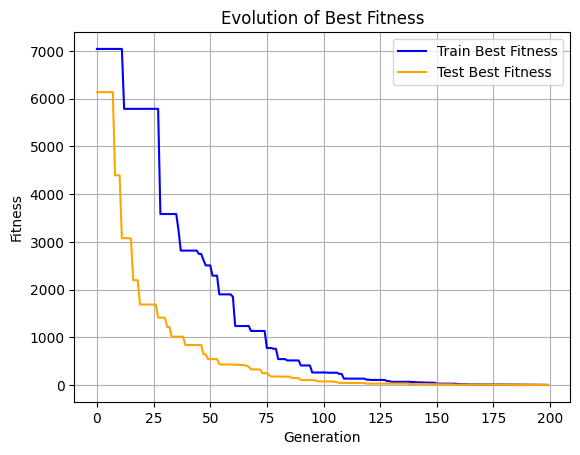

In [7]:
bounds = np.array([[-10, 10] for _ in range(16)])
de = DifferentialEvolution(objective_function=L1_reg, bounds=bounds, epochs=200)

best_solution, best_fitness, train_data = de.fit()
print("Best solution (train) :", best_solution)
print("Best fitness (train) :", best_fitness)


bounds = np.array([[-10, 10] for _ in range(16)])
de = DifferentialEvolution(objective_function=L1_reg_test, bounds=bounds, epochs=200)

best_solution, best_fitness, test_data = de.fit()
print("Best solution (test):", best_solution)
print("Best fitness (test) :", best_fitness)

plot_fitness_tt(train_data, test_data)


Best solution (train) : [ 2.98828183  5.03462252 -5.0054456   0.97622523  4.03251003  0.9752141
  0.04018321 -2.04968785 -2.98940467  2.04228013  5.03854969  4.97185623
  1.05381553 -0.95211514  0.95840941  3.03833955]
Best fitness (train) : 2.1954486657978847
Best solution (test): [ 3.06239765  4.9715719  -5.02323826  0.95447632  4.03964035  0.94045796
  0.00798252 -1.97524339 -3.01976316  2.00082627  5.03625737  4.96570458
  1.05598917 -0.94401142  0.99721813  2.95563467]
Best fitness (test) : 0.6496227410222285


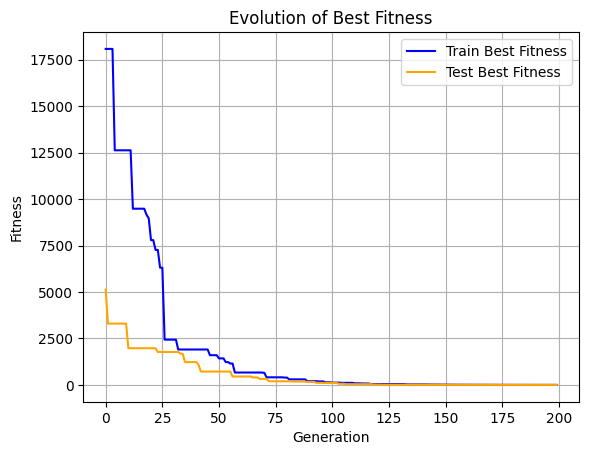

In [8]:
bounds = np.array([[-10, 10] for _ in range(16)])
de = DifferentialEvolution(objective_function=L2_reg, bounds=bounds, epochs=200)

best_solution, best_fitness, train_data = de.fit()
print("Best solution (train) :", best_solution)
print("Best fitness (train) :", best_fitness)


bounds = np.array([[-10, 10] for _ in range(16)])
de = DifferentialEvolution(objective_function=L2_reg_test, bounds=bounds, epochs=200)

best_solution, best_fitness, test_data = de.fit()
print("Best solution (test):", best_solution)
print("Best fitness (test) :", best_fitness)

plot_fitness_tt(train_data, test_data)


Best solution (train) : [ 3.00914489  5.1639442  -5.02551156  0.94705932  3.98267303  1.00469018
 -0.00518732 -1.90737122 -3.00104046  1.99333591  5.03508268  5.0023979
  0.97922162 -1.07509572  0.92532419  3.01912878]
Best fitness (train) : 3.8397719579998553
Best solution (test): [ 2.98064726e+00  4.96563142e+00 -4.99289574e+00  9.79299678e-01
  3.99201379e+00  9.64335184e-01  2.62316113e-03 -1.94687784e+00
 -2.88877832e+00  1.96242724e+00  5.04225955e+00  5.03679330e+00
  9.75401560e-01 -9.57232274e-01  9.92229248e-01  2.99142569e+00]
Best fitness (test) : 0.7931503988050859


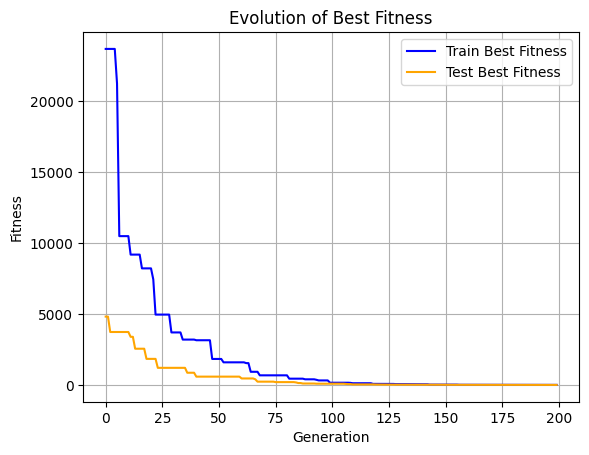

In [9]:
bounds = np.array([[-10, 10] for _ in range(16)])
de = DifferentialEvolution(objective_function=elastic_net, bounds=bounds, epochs=200)

best_solution, best_fitness, train_data = de.fit()
print("Best solution (train) :", best_solution)
print("Best fitness (train) :", best_fitness)


bounds = np.array([[-10, 10] for _ in range(16)])
de = DifferentialEvolution(objective_function=elastic_net_test, bounds=bounds, epochs=200)

best_solution, best_fitness, test_data = de.fit()
print("Best solution (test):", best_solution)
print("Best fitness (test) :", best_fitness)

plot_fitness_tt(train_data, test_data)


In [17]:
def L2_reg(*a):
    gamma = 0.00001

    error_term = sum([(y_train[i] - (a[0] + np.dot(a[1:], X_with_ones[i, 1:]))) ** 2 for i in range(len(y_train))])
    regularization_term = gamma * sum([(a[i]) ** 2 for i in range(1, len(a))])  # Exclude the bias term

    return error_term + regularization_term

def L1_reg(*a):
    gamma = 0.00001

    error_term = sum([(y_train[i] - (a[0] + np.dot(a[1:], X_with_ones[i, 1:]))) ** 2 for i in range(len(y_train))])
    regularization_term = gamma * sum([abs(a[i]) for i in range(1, len(a))])  # Exclude the bias term

    return error_term + regularization_term

def elastic_net(*a):
    gamma1 = 0.00001
    gamma2 = 0.0000005

    error_term = sum([(y_train[i] - (a[0] + np.dot(a[1:], X_with_ones[i, 1:]))) ** 2 for i in range(len(y_train))])
    regularization_term = gamma1 * sum([abs(a[i]) for i in range(1, len(a))]) + gamma2 * sum([(a[i]) ** 2 for i in range(1, len(a))]) # Exclude the bias term

    return error_term + regularization_term

def L2_reg_test(*a):
    gamma = 0.00001

    error_term = sum([(y_test[i] - (a[0] + np.dot(a[1:], X_with_ones_test[i, 1:]))) ** 2 for i in range(len(y_test))])
    regularization_term = gamma * sum([(a[i]) ** 2 for i in range(1, len(a))])  # Exclude the bias term

    return error_term + regularization_term

def L1_reg_test(*a):
    gamma = 0.00001

    error_term = sum([(y_test[i] - (a[0] + np.dot(a[1:], X_with_ones_test[i, 1:]))) ** 2 for i in range(len(y_test))])
    regularization_term = gamma * sum([abs(a[i]) for i in range(1, len(a))])  # Exclude the bias term

    return error_term + regularization_term

def elastic_net_test(*a):
    gamma1 = 0.00001
    gamma2 = 0.0000005

    error_term = sum([(y_test[i] - (a[0] + np.dot(a[1:], X_with_ones_test[i, 1:]))) ** 2 for i in range(len(y_test))])
    regularization_term = gamma1 * sum([abs(a[i]) for i in range(1, len(a))]) + gamma2 * sum([(a[i]) ** 2 for i in range(1, len(a))]) # Exclude the bias term

    return error_term + regularization_term

Best solution : [3.8885028551074647, 3.4348348856560724, -4.243661739412949, 0.614222028808987, 5.165064137365325, -0.34981565176040874, 0.3115973486910839, -3.6834057401578457, -2.2008741949075645, 1.2334260958548313, 5.069118467291181, 4.585945701309086, 0.6295621036452435, 1.203383873173136, -0.767933212283876, 5.931477092735153]
Best fitness: 2132.156822378567
Best solution : [1.3175921842236988, 4.594427639152075, -5.0917046194880236, 0.10345578741274863, 8.227858770596171, 1.9489137470631626, -0.32946166838127355, 0.2979323893507724, -5.704712498885883, 0.6464137711077846, 4.533839417203815, 5.944867437967837, 0.7787186718432721, 1.9803088743095358, 0.14438685969984633, 2.4727180555369164]
Best fitness: 762.4825245521206


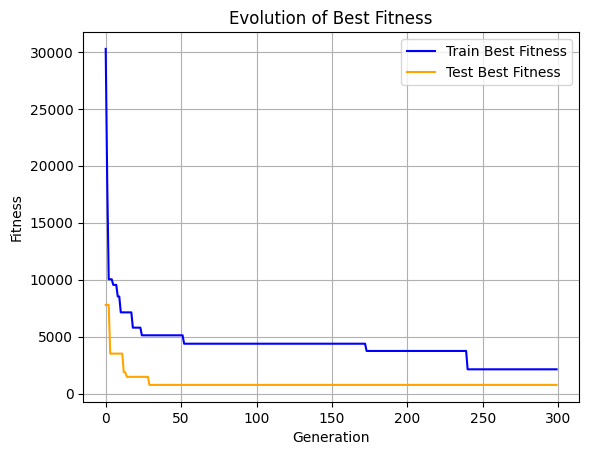

In [18]:
PSO = ParticleSwarmOptimizer(L1_reg, [-10] * 16, [10] * 16, [1] * 16, [10] * 16, epochs=300, population_size=100, dimensions=16, alpha1=0.5, alpha2=2)
best_solution = PSO.fit()
print("Best solution :", best_solution)
print("Best fitness:", L1_reg(*best_solution))

train_data = PSO._meta["best_fitness"]

PSO = ParticleSwarmOptimizer(L1_reg_test, [-10] * 16, [10] * 16, [1] * 16, [10] * 16, epochs=300, population_size=100, dimensions=16, alpha1=0.5, alpha2=2)
best_solution = PSO.fit()
print("Best solution :", best_solution)
print("Best fitness:", L1_reg_test(*best_solution))

test_data = PSO._meta["best_fitness"]


plot_fitness_tt(train_data, test_data)

Best solution : [0.4373451603108194, 6.2842437583718995, -4.803163301776389, 3.2464756577279914, 2.073542591885982, 1.474802646288797, 1.515759707006693, 0.32797245493462057, -3.933598921390324, 2.3411589965964144, 4.261279946198117, 4.519695234430212, 1.7657422903616347, 0.8852010865680064, 0.9834563249575403, 2.204589839999718]
Best fitness: 1606.0091678846677
Best solution : [0.2722390634975351, 8.479557439417704, -8.272276979790718, 0.30560262850722, 3.619726672238677, 1.7686272233446072, 0.8803740908451232, 1.3538664852256392, -2.954384043653496, 3.050244074459897, 4.462416934077186, 5.6202128343936035, -0.130530525792091, 0.31365906174882063, 0.6059007606836939, 2.8370410149531997]
Best fitness: 763.6500702052759


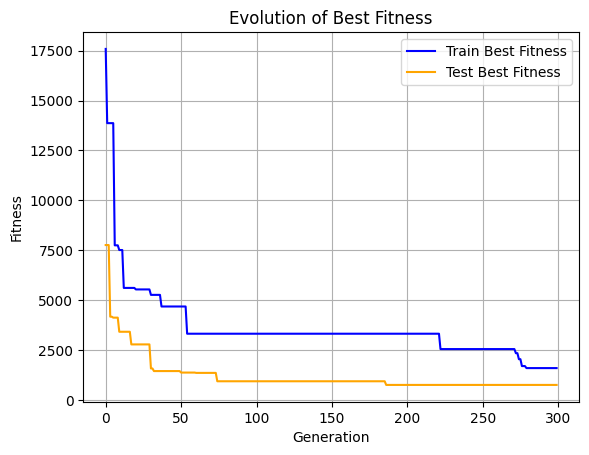

In [19]:
PSO = ParticleSwarmOptimizer(L2_reg, [-10] * 16, [10] * 16, [1] * 16, [10] * 16, epochs=300, population_size=100, dimensions=16, alpha1=0.5, alpha2=2)
best_solution = PSO.fit()
print("Best solution :", best_solution)
print("Best fitness:", L1_reg(*best_solution))

train_data = PSO._meta["best_fitness"]

PSO = ParticleSwarmOptimizer(L2_reg_test, [-10] * 16, [10] * 16, [1] * 16, [10] * 16, epochs=300, population_size=100, dimensions=16, alpha1=0.5, alpha2=2)
best_solution = PSO.fit()
print("Best solution :", best_solution)
print("Best fitness:", L1_reg_test(*best_solution))

test_data = PSO._meta["best_fitness"]


plot_fitness_tt(train_data, test_data)

Best solution : [5.720811298740402, 6.079812958779296, -4.343150593494906, -0.024340851786328388, 1.1357197434755508, 0.3213762381468741, 2.1284849821062335, -2.6930630268199396, -3.138887112664132, 3.2351209632177724, 3.9890238419562385, 3.0255874937901996, 1.0235495215773813, -1.259242312691665, 0.7357177161967963, 0.9118350124283019]
Best fitness: 1628.6269932923003
Best solution : [5.734447463041072, 1.8869729977939542, -3.1287029136526234, 2.4648465372758324, 2.502753700745618, 0.5860401181899952, 0.7109156567359651, -3.8343461657284053, -3.660898854162564, 0.1517832937743009, 2.9277296625305738, 6.077481521604904, 0.06211700499698303, 0.38012901238260177, 0.49451743216237887, 5.143716629073438]
Best fitness: 814.6315961395665


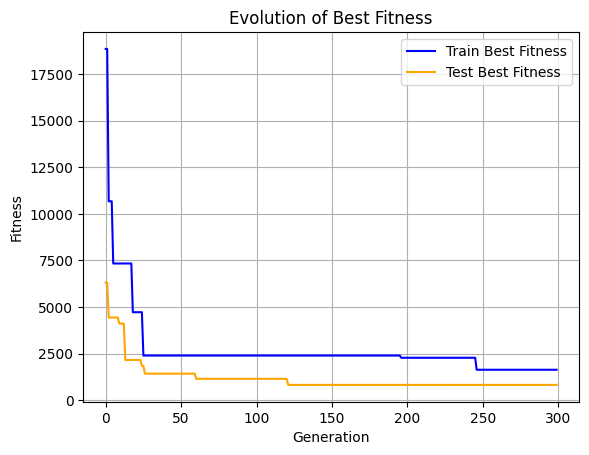

In [20]:
PSO = ParticleSwarmOptimizer(elastic_net, [-10] * 16, [10] * 16, [1] * 16, [10] * 16, epochs=300, population_size=100, dimensions=16, alpha1=0.5, alpha2=2)
best_solution = PSO.fit()
print("Best solution :", best_solution)
print("Best fitness:", L1_reg(*best_solution))

train_data = PSO._meta["best_fitness"]

PSO = ParticleSwarmOptimizer(elastic_net_test, [-10] * 16, [10] * 16, [1] * 16, [10] * 16, epochs=300, population_size=100, dimensions=16, alpha1=0.5, alpha2=2)
best_solution = PSO.fit()
print("Best solution :", best_solution)
print("Best fitness:", L1_reg_test(*best_solution))

test_data = PSO._meta["best_fitness"]


plot_fitness_tt(train_data, test_data)

In [53]:
Gamma = 0.00001

X_transpose = X_with_ones.T

X_transpose_X = np.dot(X_transpose, X_with_ones)
I = np.eye(X_with_ones.shape[1])

Gamma_I = Gamma * I

XtX_plus_GammaI = X_transpose_X + Gamma_I
XtX_plus_GammaI_inv = np.linalg.inv(XtX_plus_GammaI)
XtX_plus_GammaI_inv_Xt = np.dot(XtX_plus_GammaI_inv, X_transpose)

result = np.dot(XtX_plus_GammaI_inv_Xt, y_train)

print("Result:", result)
print(L2_reg(result))


Result: [ 3.04607568e+00  5.00395426e+00 -4.99597508e+00  1.00112287e+00
  4.00343038e+00  1.00274532e+00 -1.23817467e-03 -1.99452479e+00
 -2.99910291e+00  2.00099472e+00  4.99865204e+00  4.99718241e+00
  9.98025654e-01 -1.00790579e+00  9.99903075e-01  2.99776826e+00]
0.6019651719289284


In [55]:
def L2(a):
    gamma = 0.00001

    error_term = sum([(y[i] - (a[0] + np.dot(a[1:], X_with_ones_initial[i, 1:]))) ** 2 for i in range(len(y))])
    regularization_term = gamma * sum([(a[i]) ** 2 for i in range(1, len(a))])  # Exclude the bias term

    return error_term + regularization_term

In [56]:
Gamma = 0.00001

X_with_ones_initial = np.column_stack((np.ones(X.shape[0]), X))
X_transpose = X_with_ones_initial.T

X_transpose_X = np.dot(X_transpose, X_with_ones_initial)
I = np.eye(X_with_ones_initial.shape[1])

Gamma_I = Gamma * I

XtX_plus_GammaI = X_transpose_X + Gamma_I
XtX_plus_GammaI_inv = np.linalg.inv(XtX_plus_GammaI)
XtX_plus_GammaI_inv_Xt = np.dot(XtX_plus_GammaI_inv, X_transpose)

result = np.dot(XtX_plus_GammaI_inv_Xt, y)

print("Result:", result)
print(L2(result))


Result: [ 3.04650411e+00  5.00212057e+00 -4.99704663e+00  1.00355778e+00
  4.00239028e+00  1.00424421e+00  3.19345169e-04 -1.99486721e+00
 -3.00144266e+00  2.00105054e+00  4.99843957e+00  4.99578113e+00
  9.96284665e-01 -1.00433131e+00  9.98032714e-01  3.00025880e+00]
0.8028571028445808


In [58]:
wb = openpyxl.load_workbook('boston_housing.xlsx')
sheet = wb.active  # Load the active sheet

max_row = sheet.max_row
max_col = sheet.max_column

X_data = []
y_data = []


for col in range(1, max_col + 1):
    column_data = [sheet.cell(row=row, column=col).value for row in range(1, max_row + 1)]
    
    if col == max_col:
        y_data = column_data
    else:
        X_data.append(column_data)


X = np.array(X_data).T[1:]
y = np.array(y_data)[1:]

X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (506, 104)
Shape of y: (506,)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_with_ones = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_with_ones_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (379, 104)
Shape of y_train: (379,)
Shape of X_test: (127, 104)
Shape of y_test: (127,)


In [60]:
X_train.shape

(379, 104)

Best solution (train) : [ 7.61211993 -6.14189889 -0.25815855 -1.34498289  4.97233476  9.2107796
  9.4369894   1.11332249 -9.16302911  6.07968652  5.72177285  7.45489493
  7.23734276  5.41733019  3.11268603 -8.45754285 -8.56516799  1.36597916
 -4.93910701 -2.55549806  8.14479061 -6.81758476 -7.01998994 -5.22529651
  1.47513335  5.60006418 -0.78075953  2.27110654  6.49171195  8.73821413
 -1.07999447  8.50720386 -6.03565228  3.3618357   4.68512412  5.74030451
 -0.71244319 -5.70054821  1.59904995  6.63124779 -0.5974714  -4.28138756
 -8.87551673  5.20376145 -8.18761263  6.2186141   4.03975099  0.21905297
  1.15711121 -7.00409027 -0.20728092 -5.76241504  2.22859956 -5.54101291
 -7.97223109  8.82022971  7.21548291 -6.69239716  1.43719628 -3.56014835
 -4.98777503 -4.22255116 -3.05161159  7.60555257 -8.1331751   4.96906475
 -6.07155431 -1.54584484 -5.2652038   9.87817474  2.47596724  8.84099635
 -9.63579077 -9.42223531  2.00661787  8.04165339 -9.37494146  5.99777663
 -7.89094567  9.15911807 -5.

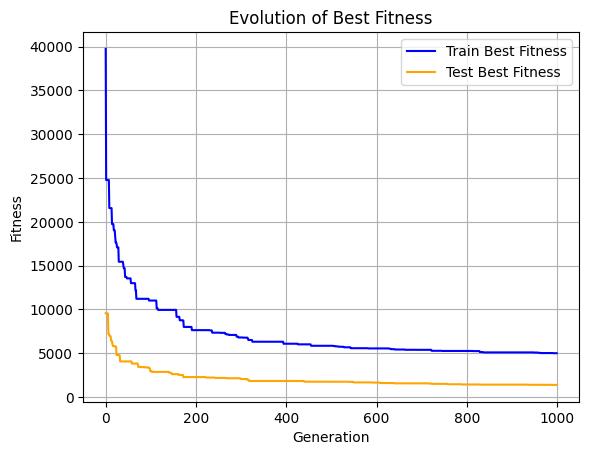

In [61]:
bounds = np.array([[-10, 10] for _ in range(105)])
de = DifferentialEvolution(objective_function=L2_reg, bounds=bounds, epochs=1000)

best_solution, best_fitness, train_data = de.fit()
print("Best solution (train) :", best_solution)
print("Best fitness (train) :", best_fitness)


bounds = np.array([[-10, 10] for _ in range(105)])
de = DifferentialEvolution(objective_function=L2_reg_test, bounds=bounds, epochs=1000)

best_solution, best_fitness, test_data = de.fit()
print("Best solution (test):", best_solution)
print("Best fitness (test) :", best_fitness)

plot_fitness_tt(train_data, test_data)

In [64]:
Gamma = 0.00001

X_with_ones_initial = np.column_stack((np.ones(X.shape[0]), X))
X_transpose = X_with_ones_initial.T

X_transpose_X = np.dot(X_transpose, X_with_ones_initial)
I = np.eye(X_with_ones_initial.shape[1])

Gamma_I = Gamma * I

XtX_plus_GammaI = X_transpose_X + Gamma_I
XtX_plus_GammaI_inv = np.linalg.inv(XtX_plus_GammaI)
XtX_plus_GammaI_inv_Xt = np.dot(XtX_plus_GammaI_inv, X_transpose)

result = np.dot(XtX_plus_GammaI_inv_Xt, y)

print("Result:", result)
print(L2(result))


Result: [-2.78732172e+01 -1.53133593e+02 -1.03238174e+01 -8.32598418e+01
  7.75755828e+00  1.48546432e+01  7.55557420e+01  4.11448477e+01
 -4.12434886e+01  2.16555330e+01  3.25798901e+01  1.29960218e+01
  3.38862077e+01  1.93621345e+01  1.24557473e+01  3.46794872e+02
  2.77987397e+02  2.23863985e+02 -3.20809384e+01  6.37927098e+01
 -2.65933888e+01 -9.01218140e+01 -1.61102851e+02 -4.81027234e+01
  1.79011825e+02 -1.12014812e+01  6.65313117e+01 -4.63583265e+00
 -1.36188482e+01 -5.90458927e+00 -4.82859755e+01  6.38989633e+00
  3.08946967e-01 -1.40177805e+01 -1.02658754e+01  3.29346553e+01
 -5.46045071e+00  2.26659398e+01 -1.39759561e+01  2.71447157e+01
  1.60368914e-01  1.83884980e+01  4.24507223e+01  9.42739783e+00
  4.12326582e+01 -1.22952609e+01  9.19969591e+00  6.48812578e-01
  2.45158257e+01 -8.19302077e+00  7.75755839e+00 -1.59561972e+01
 -2.85139818e+01  1.69922407e+00  1.29025223e+01 -2.33146081e+00
  2.22778141e+00 -7.78610013e+00  7.69458509e+00 -9.26982154e+00
 -1.15024379e+01 